improting libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data colection in processing 

In [ ]:
# loading th csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv') 

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns 
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about the data
gold_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values 
gold_data.isnull().sum() 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# gitting the studystical of the data
gold_data.describe() 

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positve correlation 
2. negative correlation


In [ ]:
correlation = gold_data.corr() 

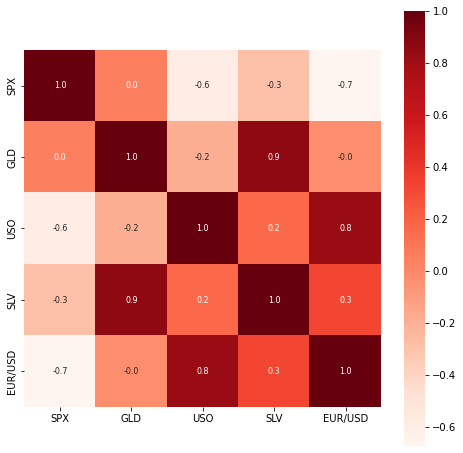

In [ ]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


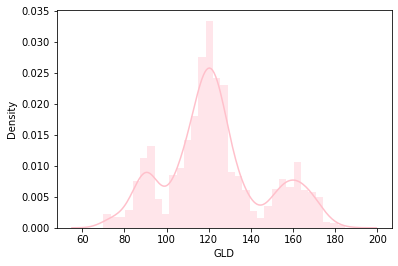

In [ ]:
# checking the distribution of the GLD price 
sns.distplot(gold_data['GLD'],color='pink')

splitting the features and target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

model training: random forest regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

model evaluation 

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.52179948  82.00599988 115.71939986 127.60160082 120.91180108
 154.75459788 150.60209831 125.93859995 117.46039867 126.01310078
 116.58610097 171.58590054 142.0864995  167.92439904 115.1054002
 117.54070044 139.13900331 170.28020091 158.72710261 158.64889897
 155.18220026 125.07860021 175.66820003 157.46730333 125.25640034
  93.75839988  77.53210007 120.54349988 119.1539995  167.55719986
  88.12550018 125.43680031  91.01290079 117.44490075 121.11949921
 136.1877007  115.57530106 115.59090096 147.76049987 107.05830125
 104.73920262  87.2388979  126.4767003  117.98780012 152.38789873
 119.6972996  108.32500042 108.22669824  93.22300063 127.07349795
  74.89040044 113.60009894 121.50770012 111.36759902 119.02059885
 120.30199919 160.09969948 168.16440082 146.57499677  85.99859871
  94.14640035  86.85309867  90.5067004  118.99440087 126.49560074
 127.62560066 170.32480093 122.2819995  117.38109897  98.94429991
 168.08220097 143.02689767 131.84870243 121.14630226 120.70279962
 119.721900

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error : ", error_score)

R square error :  0.9883999251676158


compare the acutal value and predicted values in a plot

In [ ]:
Y_test = list(Y_test)

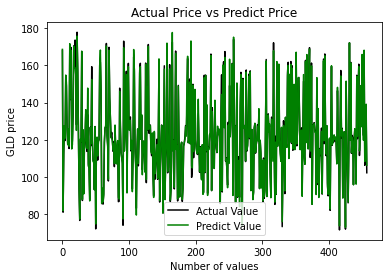

In [ ]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predict Value')
plt.title('Actual Price vs Predict Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()